
Entrega #4 - Dynamic Programming - Value iteration Gambler's Problem

@author: Leonardo Pezenatto da Silva
@email: leonardo.pezenatto@posgrad.ufsc.br
@date: Jun 20, 2023



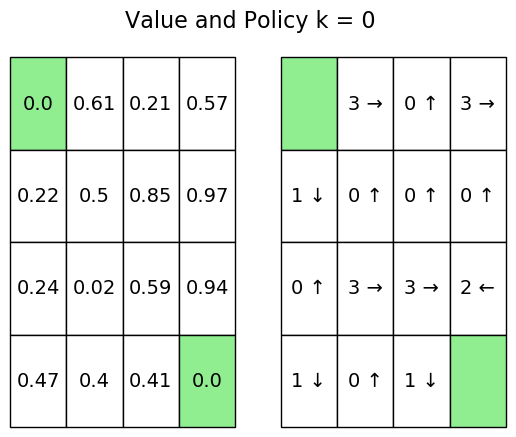

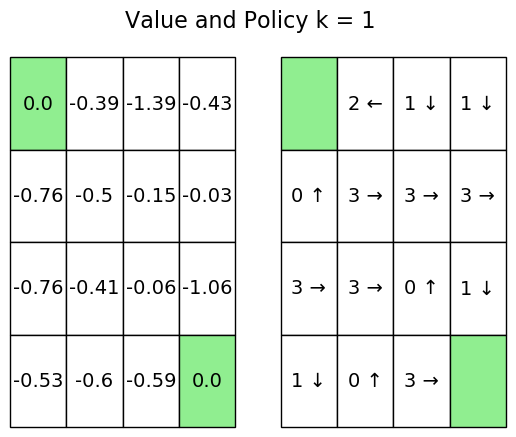

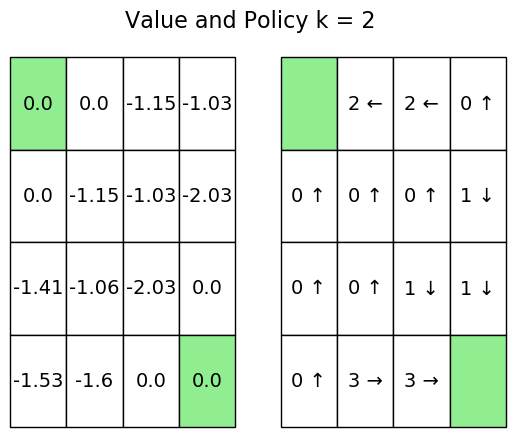

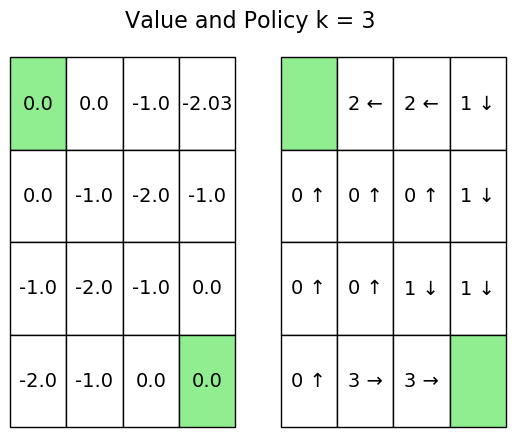

In [1]:
#!/usr/bin/env python

"""
Entrega #4 - Dynamic Programming - Value iteration Gambler's Problem

@author: Leonardo Pezenatto da Silva
@email: leonardo.pezenatto@posgrad.ufsc.br
@date: Jun 20, 2023
"""

import numpy as np
import matplotlib.pyplot as plt

print(__doc__)

class GridWorld:
    """
    Class GridWorld.
    Have all methods needed to implement the Grid World example
    with policy evaluation and policy evaluation.  
    """
    def __init__(self, grid_size, prob, discount, theta=0.00000001):
        self.value_recorded = []
        self.policy_recorded = []
        self.prob = prob
        self.discount = discount
        self.theta = theta
        self.num_states = grid_size
        
    def setup(self):

        # Create a random list between 0 and 1     
        self.value = np.random.rand(self.num_states)

        # Set 0 on the first and last element
        self.value[0] = 0 
        self.value[self.num_states - 1] = 0 
        
        # Set a list of num_states values -1
        self.reward = np.full(self.num_states,-1) 
        
        # Set 0 on the first and last element
        self.reward[0] = 0 
        self.reward[self.num_states - 1] = 0 

        # Create a random matrix to be the first policy
        self.policy = np.random.randint(0, 4, size=(int(np.sqrt(self.num_states)), int(np.sqrt(self.num_states))))

        # Transform vector to matrix
        self.value_grid = self.value.reshape(int(np.sqrt(self.num_states)),int(np.sqrt(self.num_states)))
        self.grid_rows, self.grid_columns = self.value_grid.shape
        
    def next_state(self, state_index, action):
        """
        Class GridWorld.
        Have all methods needed to implement the Grid World example
        with policy evaluation and policy evaluation.  
        """
        if action == 0: # Up
            new_row = max(0, state_index[0] - 1)
            new_columns = state_index[1]
        elif action == 1: # Down
            new_row = min(self.grid_rows - 1, state_index[0] + 1)
            new_columns = state_index[1]
        elif action == 2: # Left
            new_row = state_index[0]
            new_columns = max(0, state_index[1] - 1)
        elif action == 3: # Right
            new_row = state_index[0]
            new_columns = min(self.grid_columns - 1, state_index[1] + 1)
        return new_row, new_columns
      
    def policy_evaluation(self):
        """
        Policy evaluation, for estimating values.
        """
        delta = 0
        p = np.zeros(4)
        while delta < self.theta:
            for row in range(self.grid_rows):
                for column in range(self.grid_columns):
                    state_index = [row, column]
                    state = np.ravel_multi_index(state_index, dims=(self.grid_rows, self.grid_columns))
                    if self.reward[state] != 0:
                        # Store the previous value of current state
                        previous_value = self.value[state]
                        for action in range(4): 
                            if self.policy[state_index[0], state_index[1]] == action:
                                new_row, new_columns = self.next_state(state_index, action)
                            else:
                                new_row = row
                                new_columns = column
                            state = np.ravel_multi_index([new_row, new_columns], dims=(self.grid_rows, self.grid_columns))
                            # Calculates the value of a action from a current state
                            p[action] = self.prob*(self.reward[state] + self.value[state] * self.discount)
                        # Update the maximum value
                        self.value[state] = max(p)
                        # Update grid
                        self.value_grid[row, column] = self.value[state]
                        # Update delta
                        delta = max(delta, abs(previous_value - self.value[state]))
        # Store the new values
        self.value_recorded.append(self.value_grid.copy())

    def policy_improvement(self):
        """
        Improve the policy
        """
        p = np.zeros(4)
        policy_stable = True
        for row in range(self.grid_rows):
            for column in range(self.grid_columns):
                state_index = [row, column]
                state = np.ravel_multi_index(state_index, dims=(self.grid_rows, self.grid_columns))
                # Store the previous value of current state
                previous_action = self.policy[row, column]
                if self.reward[state] != 0:
                    for action in range(4): 
                        new_row, new_columns = self.next_state(state_index, action)
                        state = np.ravel_multi_index([new_row, new_columns], dims=(self.grid_rows, self.grid_columns))
                        # Calculates the value of a action from a current state
                        p[action] = self.prob*(self.reward[state] + self.value[state] * self.discount)
                    # Update policy
                    self.policy[row, column] = np.argmax(p)
                if previous_action != self.policy[row, column]:
                    policy_stable = False

        # Store the new values
        self.policy_recorded.append(self.policy.copy())

        return policy_stable

    def compute(self):
        """
        Compute the successive iterations and the final policy
        until policy get stable
        """
        self.setup()
        policy_stable = False
        k = 0
        while not policy_stable:
            self.plot_gridworld(k)
            self.policy_evaluation()
            policy_stable = self.policy_improvement()
            k += 1
        

    def plot_gridworld(self, k):
        """
        Plot on a graph the value matrix and the policy matrix
        """
        arrows = ['↑', '↓', '←', '→']
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.suptitle('Value and Policy k = '+ str(k), fontsize=16)

        ax1.axis('off')
        ax2.axis('off')

        value_grid = np.around(self.value_grid, decimals=2)
        value_table = ax1.table(cellText=value_grid, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
        value_table.auto_set_font_size(False)
        value_table.set_fontsize(14)
        value_table[0, 0].set_facecolor('lightgreen')
        value_table[self.grid_rows-1, self.grid_columns-1].set_facecolor('lightgreen')

        policy_table = ax2.table(cellText=self.policy, loc='center', cellLoc='center', bbox=[0, 0, 1, 1])
        policy_table.auto_set_font_size(False)
        policy_table.set_fontsize(14)
        policy_table[0, 0].set_facecolor('lightgreen')
        policy_table[self.grid_rows-1, self.grid_columns-1].set_facecolor('lightgreen')
        
        for i in range(self.policy.shape[0]):
            for j in range(self.policy.shape[1]):
                if [i,j] != [0,0] and [i,j] != [self.grid_rows-1, self.grid_columns-1]:
                    value = self.policy[i, j]
                    arrow_symbol = arrows[value]
                    policy_table[i, j].get_text().set_text(f'{value} {arrow_symbol}')
                    policy_table[i, j].get_text().set_fontsize(14)
                else:
                    policy_table[i, j].get_text().set_text('')
        plt.show()

if __name__ == "__main__":
    g = GridWorld(4*4, 1, 1)
    g.compute()